# 1.0 Defining the question

## 1.1 Specifying the question

In [ ]:
# Research question:
# Predict which individuals are most likely to have or use a bank account.
# Provide an indication of the state of the financial inclusion in kenya, Rwanda, Tanzania and Uganda
# Provide insights into some of the key demographic factors that might drive individual's financial outcomes.

## 1.2 Defining mertic for success

In [ ]:
# The following areas will be covered to achieve the objectives of the project:

# Exploratory Data Analysis
# Univariate, Bivariate and Multivariate analysis
# Visualizations
# Reduction techniques 
# Mutiple Regression model

## 1.3 Understanding the context

In [ ]:
# Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, 
# banks still play a pivotal role in facilitating access to financial services. 
# Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and 
# improve their access to other financial services. 
# Therefore, access to bank accounts is an essential contributor to long-term economic growth.

## 1.4 Recording the experimental design

In [ ]:
# To successfully conduct this project the following steps will be taken in order:

# Conduct Exploratory Data Analysis
# Univariate, Bivariate and Multivariate analysis
# Create Visualizations
# Apply Reduction techniques 
# Create a Mutiple Regression model for predictions
# challenging the colution to find our if its the best for this for this particular scenario.

## 1.5 Data Relevance

In [ ]:
# The main dataset contains demographic information and what financial services are used by individuals across East Africa.
# This data was extracted from various Finscope surveys ranging from 2016 to 2018, and more information about these surveys can be found here:
# FinAccess Kenya 2018: https://fsdkenya.org/publication/finaccess2019/
# Finscope Rwanda 2016: http://www.statistics.gov.rw/publication/finscope-rwanda-2016
# Finscope Tanzania 2017:  http://www.fsdt.or.tz/finscope/
# Finscope Uganda 2018: http://fsduganda.or.ug/finscope-2018-survey-report/ 
# Dataset Files:

# Variable Definitions: http://bit.ly/VariableDefinitions 
# Dataset: http://bit.ly/FinancialDataset

# 2.0 Dataset

## 2.1 Importing Libraries

In [1]:
# Importing Pandas
# 
import pandas as pd

In [2]:
# Importing Numpy
#
import numpy as np

In [3]:
# Importing Seaborn
#
import seaborn as sns

In [4]:
# Importing Matplotlib
#
import matplotlib.pyplot as plt

## 2.2 Loading the dataset

In [5]:
finance = pd.read_csv("/content/Financial Dataset - 1.csv")
finance.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
# Checking if datatypes for each column are appropriate

finance.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [7]:
#Checking the columns

finance.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

# 3.0 Data Cleaning

## 3.1 Dropping Columns

In [8]:
#Dropping uniqueid column that is not needed for analysis

finance = finance.drop(['uniqueid'], axis = 1)

## 3.2 Messy column names

In [9]:
#Setting column names to lower case and removing spaces

finance.columns = finance.columns.str.lower().str.replace(" ", "_")

In [10]:
finance.columns

Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [11]:
#Correcting "level_of_educuation" and "the_relathip_with_head"

finance.rename(columns={'the_relathip_with_head':'the_relationship_with_head'}, inplace=True)
finance.rename(columns={'level_of_educuation':'level_of_education'}, inplace=True)

In [12]:
#Confirming columns

finance.columns

Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relationship_with_head', 'marital_status',
       'level_of_education', 'type_of_job'],
      dtype='object')

## 3.3 Missing Values

In [13]:
#Check missing values per column

finance.isnull().sum()

country                       14
year                           0
has_a_bank_account            36
type_of_location              15
cell_phone_access             11
household_size                28
respondent_age                34
gender_of_respondent          34
the_relationship_with_head     4
marital_status                32
level_of_education            29
type_of_job                   30
dtype: int64

In [14]:
#Dropping the null values

finance.dropna(inplace=True)

In [15]:
#Confirm that there are no missing values

finance.isnull().sum()

country                       0
year                          0
has_a_bank_account            0
type_of_location              0
cell_phone_access             0
household_size                0
respondent_age                0
gender_of_respondent          0
the_relationship_with_head    0
marital_status                0
level_of_education            0
type_of_job                   0
dtype: int64

## 3.4 Checking for outliers

<function matplotlib.pyplot.show>

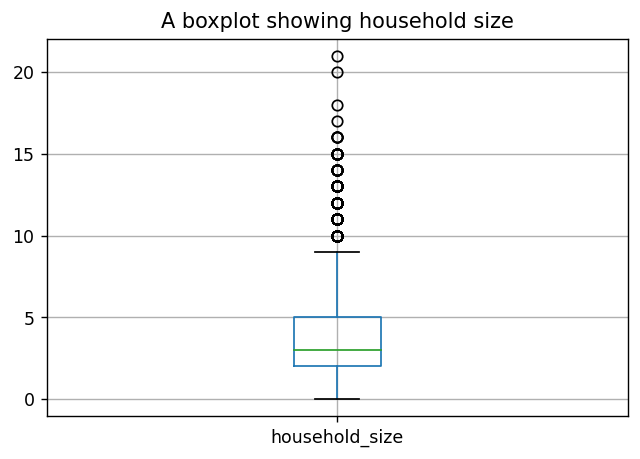

In [16]:
#The columns of household_size of respondent_age need to be checked for outliers
#A boxplot will be used to check for any outliers

plt.figure(dpi = 125)
finance.boxplot(['household_size'])
plt.title("A boxplot showing household size")
plt.show

<function matplotlib.pyplot.show>

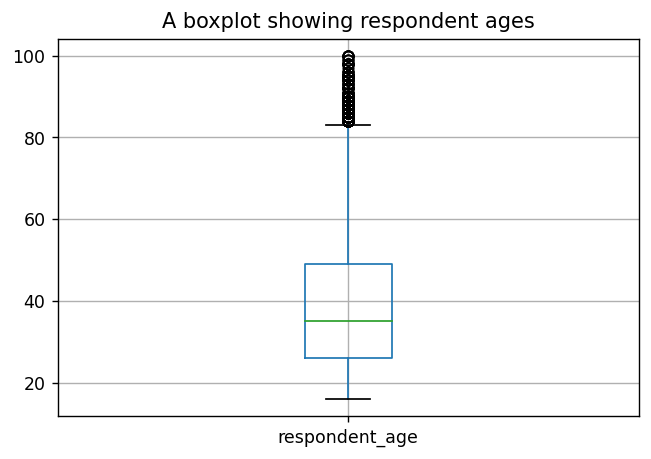

In [17]:
plt.figure(dpi = 125)
finance.boxplot(['respondent_age'])
plt.title("A boxplot showing respondent ages")
plt.show

# 4.0 Exploratory Data Analysis

## 4.1 Univariate Analysis

### 4.1.1 Visualization

#### 4.1.1 (a) Pie Charts

ValueError: ignored

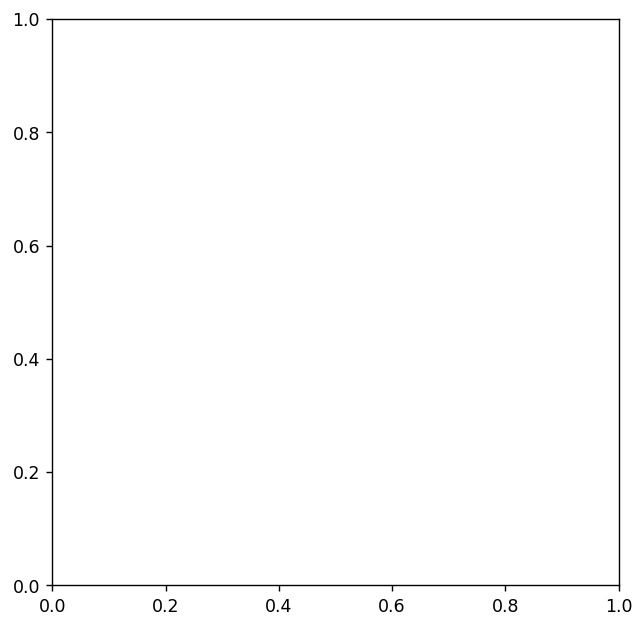

In [18]:
# A pie chart representing those with a bank account and those without
#First, we group the data

bank = finance.has_a_bank_account
bank

data = bank.values
data

size = bank.index
size

explode=(0.1, 0, 0, 0)

plt.figure(figsize = (6,6), dpi = 125)
plt.pie(data, labels = size, autopct='%1.1f%%', shadow=True, startangle = 90)
plt.axis('equal')
plt.title('A pie chart representing those with a bank account and those without.')
plt.show

<function matplotlib.pyplot.show>

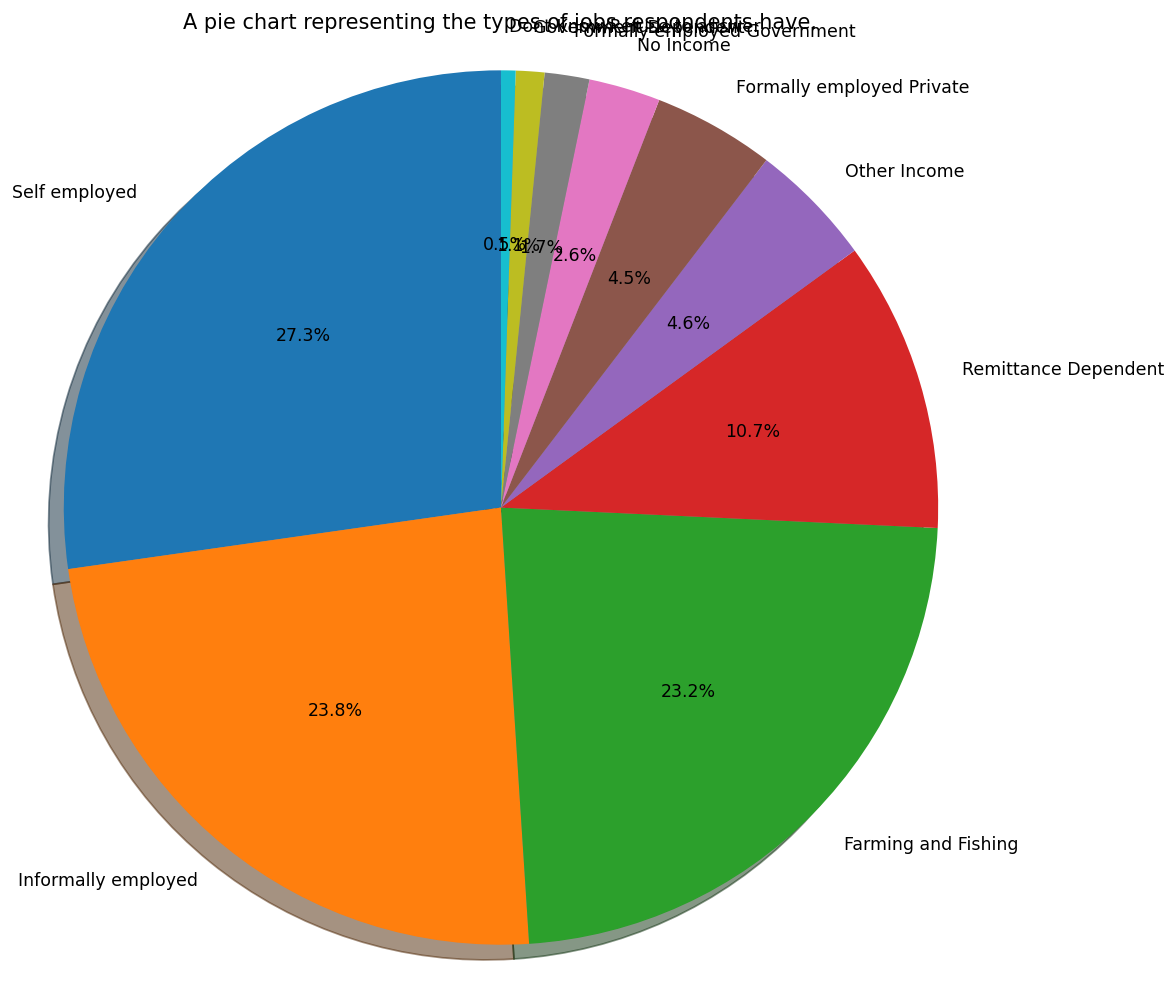

In [19]:
# A pie chart representing the types of jobs
#grouping the data

job = finance.type_of_job.value_counts()
job

size2 = job.index
size

data2 = job.values
data2

explode=(0.1, 0, 0, 0)

plt.figure(figsize = (10,10), dpi = 125)
plt.pie(data2, labels = size2, autopct='%1.1f%%', shadow=True, startangle = 90)
plt.axis('equal')

#Giving a title to our chart
plt.title('A pie chart representing the types of jobs respondents have.')

#Displaying our chart
plt.show

# The chart shows that the most common jobs were self employment, informal employment
# and Farming and Fishing

#### 4.1.1 (b) Bar Graphs

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


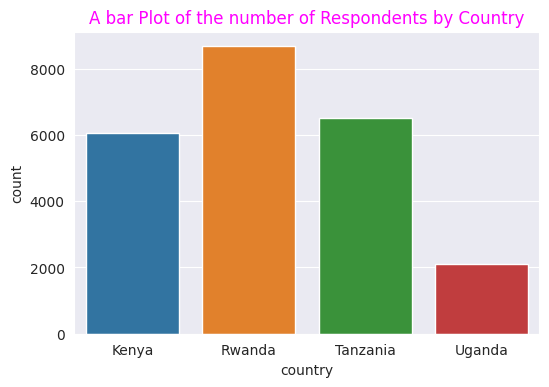

In [20]:
# A bar graph of the respondents' country 

# specifying our chart size
plt.figure(dpi = 100)
sns.set_style('darkgrid')
sns.countplot(finance.country)

# Giving a title to our chart
plt.title('A bar Plot of the number of Respondents by Country', color = 'magenta')

# Displaying our chart
plt.show()


# The bar chart shows that most respondents were from Rwanda 
# The least number of respondents were from Uganda

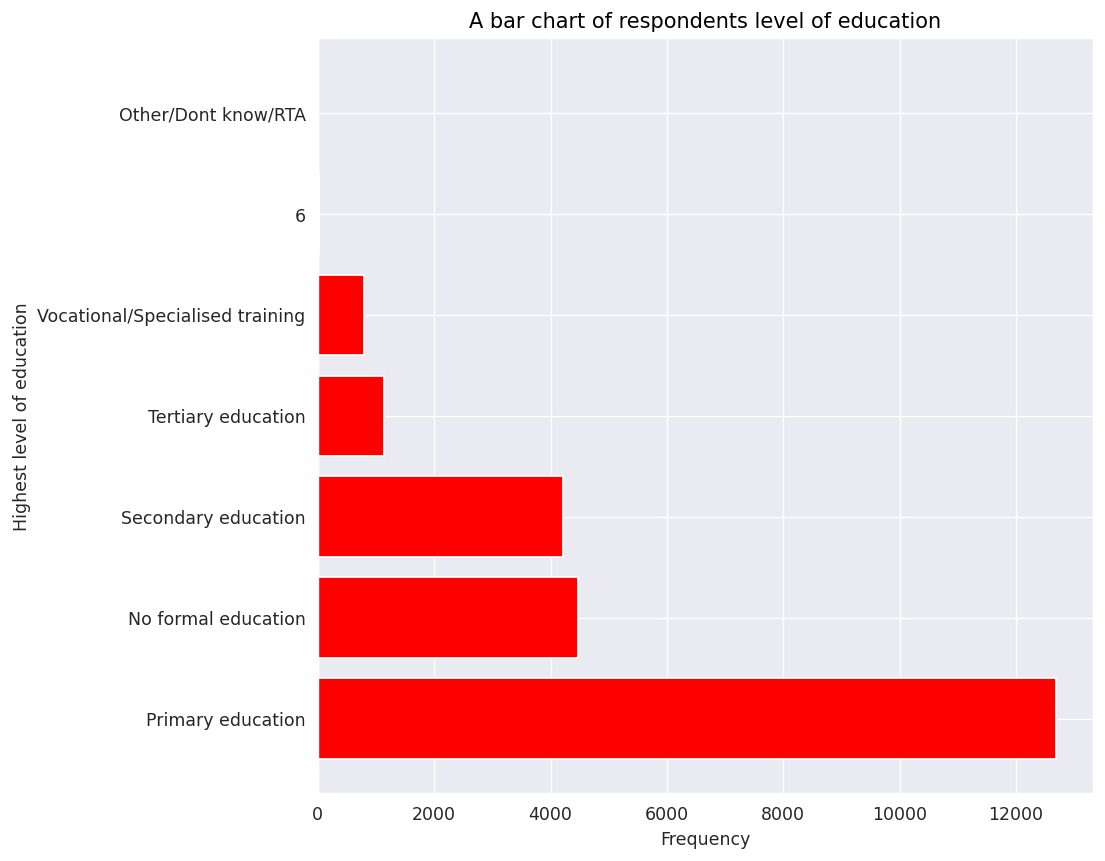

In [21]:
# A horizontal bar chart of the respondents' highest level of education 

# grouping the data to be plotted
study = finance.level_of_education.value_counts()
study

# accessing the data to plot

# labels
size3= study.index
size3

# values
data3 = study.values
data3

# specifying our chart size
plt.figure(figsize = (8,8), dpi = 125)
plt.barh(size3, data3, color = 'red')

# labeling the y axis
plt.ylabel("Highest level of education")

# labeling the x axis
plt.xlabel('Frequency')

# Giving a title to our chart
plt.title("A bar chart of respondents level of education", color = 'black')

# Displaying our chart
plt.show()


# most respondents' highest level of education was the primary school
# there are other categories with the least number (others and 6)
# the 6 category seems to be an anomaly.

#### 4.1.1 (c) Histograms

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


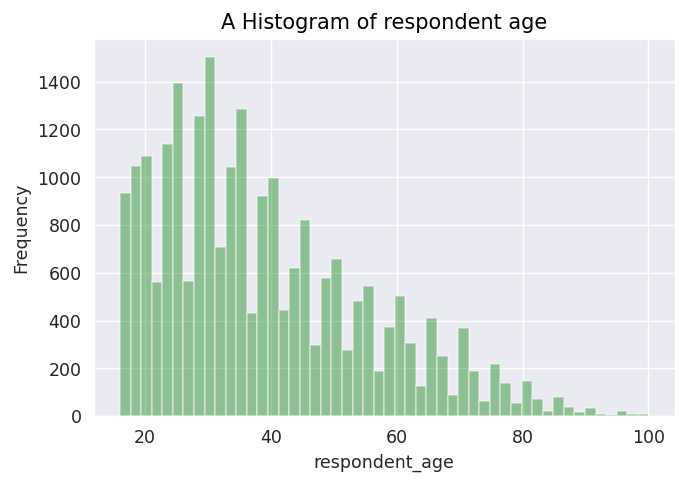

In [22]:
# Histogram of respondent age

plt.figure(dpi = 125)
sns.set_style('darkgrid')
sns.distplot(finance['respondent_age'], kde = False, color = 'green')  

# Giving a title to our chart
plt.title('A Histogram of respondent age', color = 'black')

# labeling the y axis
plt.ylabel('Frequency')

# Displaying our chart
plt.show()


# The age distribution is skewed to the right
# This is because the tail is long to the right side

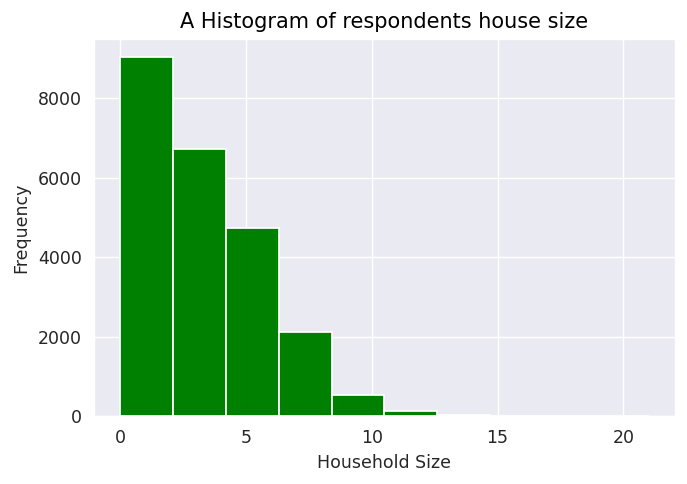

In [23]:
# Histogram of respondents' household size

plt.figure(dpi = 125)
plt.hist(finance['household_size'], bins = 10, histtype= 'bar', color = 'green')

# Giving a title to our chart
plt.title('A Histogram of respondents house size', color = 'black')

# labeling x axis
plt.xlabel('Household Size')

# labeling y axis
plt.ylabel('Frequency')

# Displaying our chart
plt.show()


# The age distribution is skewed to the right
# This is because the tail is long to the right side

#### 4.1.1 (d) Frequency Tables

In [24]:
# Frequency ttable of cell_phone_access and value counts

phone = pd.crosstab(index= finance['cell_phone_access'], columns= 'count')
phone

col_0,count
cell_phone_access,
No,6009
Yes,17334


In [25]:
# Frequency ttable of type_of_location and value counts

location = pd.crosstab(index= finance['type_of_location'], columns= 'count')
location

col_0,count
type_of_location,
Rural,14264
Urban,9079


In [26]:
# Frequency ttable of the_relationship_with_head and value counts

head = pd.crosstab(index= finance['the_relationship_with_head'], columns= 'count')
head

col_0,count
the_relationship_with_head,
Child,2221
Head of Household,12730
Other non-relatives,189
Other relative,663
Parent,1069
Spouse,6471


In [27]:
# Frequency ttable of marital_status and value counts

marry = pd.crosstab(index= finance['marital_status'], columns= 'count')
marry

col_0,count
marital_status,
Divorced/Seperated,2049
Dont know,8
Married/Living together,10700
Single/Never Married,7903
Widowed,2683


### 4.1.2 Analysis

#### 4.1.2 (a) Measures of central tendency

##### 4.1.2 (aa) Mean

In [28]:
# Average household size

finance.household_size.mean()

3.6886432763569377

In [29]:
# Average age

finance.respondent_age.mean()

38.80550914621085

##### 4.1.2 (ab) Mode

In [30]:
# Modal household size

finance.household_size.mode()

0    2.0
dtype: float64

In [31]:
# Modal age

finance.respondent_age.mode()

0    30.0
dtype: float64

##### 4.1.2 (ac) Median

In [32]:
# Median household size

finance.household_size.median()

3.0

In [33]:
# Median age

finance.respondent_age.median()

35.0

#### 4.1.2 (b) Measures of Dispersion

##### 4.1.2 (ba) Range

In [34]:
# Range of household_size

# find max value 
house_max = finance.household_size.max()

# find min value
house_min = finance.household_size.min()

#find difference(range)
house_range = house_max - house_min
house_range

21.0

In [35]:
# Range of age

# find max value 
age_max = finance.respondent_age.max()

# find min value
age_min = finance.respondent_age.min()

#find difference(range)
age_range = age_max - age_min
age_range

84.0

##### 4.1.2 (bb) Quantiles

In [36]:
# Quantiles of household_size

finance["household_size"].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

In [37]:
# Quantiles of age

finance["respondent_age"].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    49.0
Name: respondent_age, dtype: float64

##### 4.1.2 (bc) Standard Deviation (std)

In [38]:
# std of household_size

finance.household_size.std()

2.2811835250351495

In [39]:
# std of respondent_age

finance.respondent_age.std()

16.51980349804178

##### 4.1.2 (bd) Variance

In [40]:
# Variance of household size

finance.household_size.var()

5.20379827489179

In [41]:
# Variance of age

finance.respondent_age.var()

272.90390761391353

##### 4.1.2 (be) Skewness

In [42]:
# Skewness of household size

finance.household_size.skew()

0.9741086837897069

In [43]:
# Skewness of age

finance.respondent_age.skew()

0.840661747532081

##### 4.1.2 (bf) Kurtosis

In [44]:
# Kurtosis of household size

finance.household_size.kurt()

1.1538690689335573

In [45]:
# Kurtosis of age size

finance.respondent_age.kurt()

0.09844652254807196

## 4.2 Bivariate Analysis

### 4.2.1 Visualization

#### 4.2.1 (a) Scatter Plot

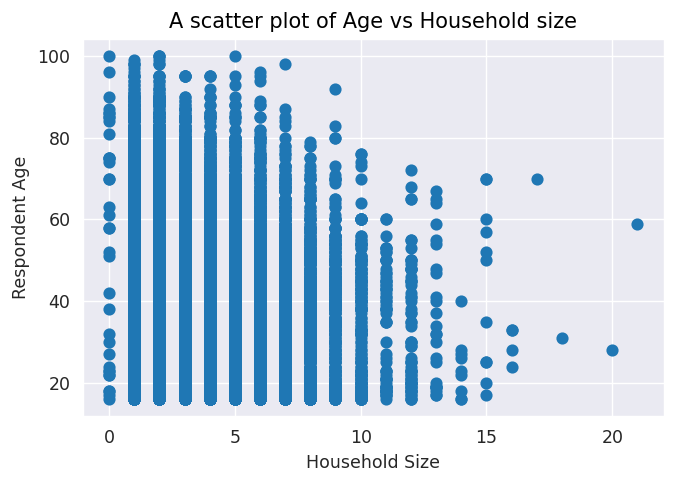

In [46]:
# Specifying chart size

plt.figure(dpi= 125)

# plotting scatter plot
plt.scatter(finance['household_size'], finance['respondent_age'])

# titling scatter plot
plt.title('A scatter plot of Age vs Household size', color= 'black')

# labeling the x and y axis
plt.xlabel('Household Size')
plt.ylabel('Respondent Age')

# displaying scatter plot
plt.show()

#### 4.2.1 (b) Line Chart

In [47]:
# We create a new data frame to compare household_size and respondent_age
# There are too many values for a line graph so we take 1st 50 rows

finance2 = finance.iloc[0:50, -7:-5]
finance2.head()

,household_size,respondent_age
0,3.0,24.0
1,5.0,70.0
2,5.0,26.0
3,5.0,34.0
4,8.0,26.0


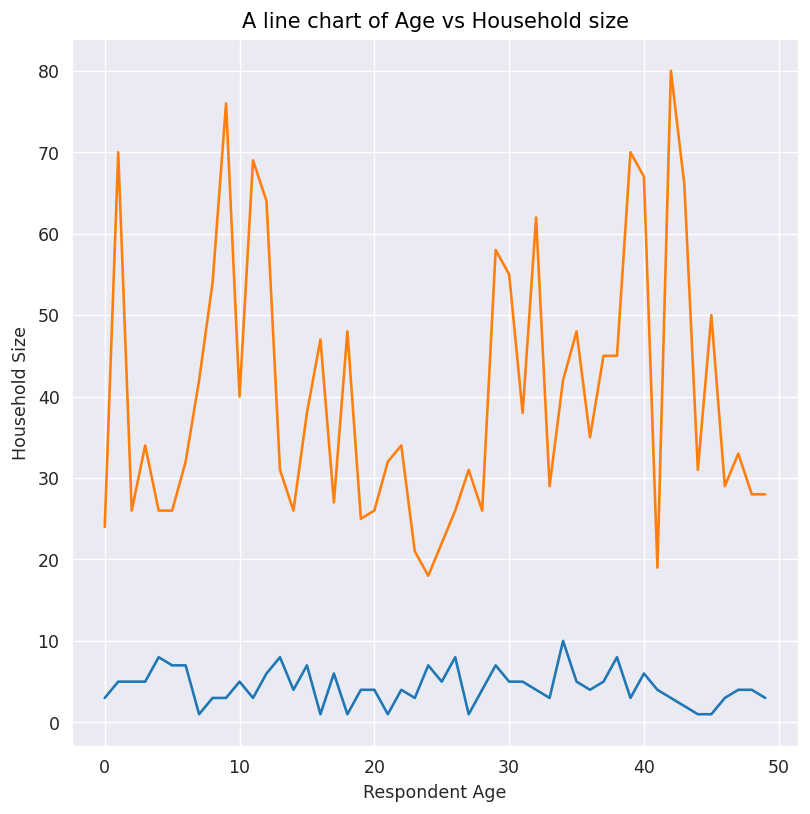

In [48]:
# Specifying chart size

plt.figure(figsize=(7.5,7.5), dpi= 125)

# plotting line chart
plt.plot(finance2[['household_size','respondent_age']])

# titling line chart
plt.title('A line chart of Age vs Household size', color= 'black')

# labeling the x and y axis
plt.ylabel('Household Size')
plt.xlabel('Respondent Age')

# displaying line chart
plt.show()

#### 4.2.1 (c) Correlation

In [49]:
# Calculating the pearson coefficient of the entire dataframe

finance.corr()

,year,household_size,respondent_age
year,1.000000,-0.048902,-0.019062
household_size,-0.048902,1.000000,-0.119709
respondent_age,-0.019062,-0.119709,1.000000


In [50]:
# Calculating the Pearson Correlation Co-efficient
# We do not need to define the pearson, it calculates by default

pcorr = finance["respondent_age"].corr(finance["household_size"]) 
print(pcorr)



# Since the correlation coefficent of Age and Household is -0.12, 
# this means that Age and Household have a very weak negative correlation

-0.11970919507762415


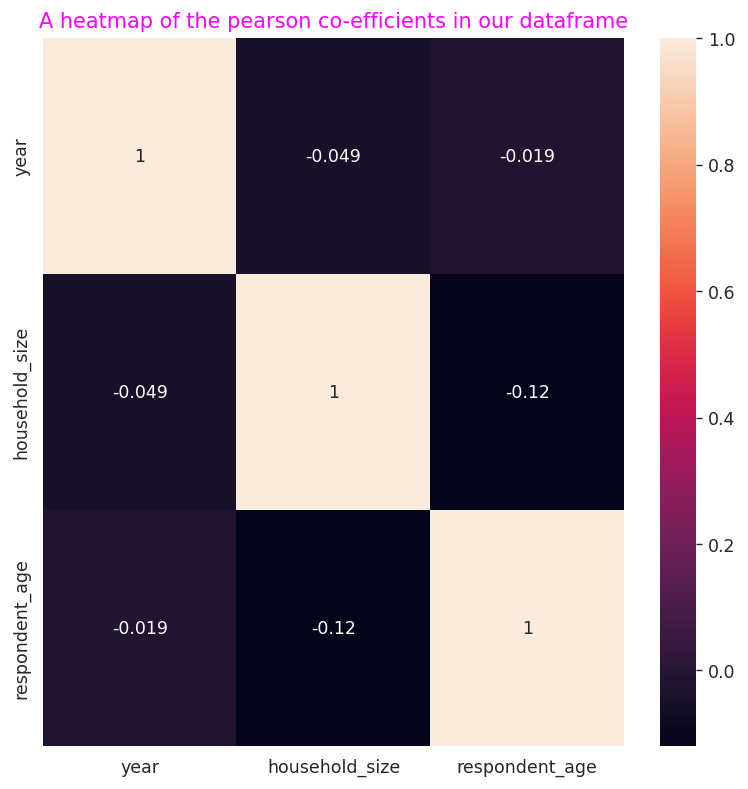

In [51]:
# Heatmap

# defining our data
x = finance.corr()

# figure size specifications
plt.figure(figsize = (7.5,7.5), dpi = 125)

# using the Seaborn Visualization library
sns.heatmap(x, xticklabels = x.columns, yticklabels=x.columns, annot = True)

# labeling the title
plt.title('A heatmap of the pearson co-efficients in our dataframe', color = "magenta")

# displaying our chart
plt.show()

# all the variables have weak negative correlation with other variables other with themselves

## 4.3 Multivariate Analysis

Here we focus on analyzing more than 2 statistical variables at once.
We have many variables.
To visualize patterns much better, we can reduce the variables into 2 or 3 significant ones without losing the essence of the data collected.



To analyse multiple categorical variables we can turn them into dummies (zeros and ones). Pandas can turn a categorical variables into a series of zeros and ones, making them easier to compare.

In [107]:
# Turning categorical variables into dummy variables with zeros and ones
# pd.get_dummies creates a new dataframe which consists of zeros and ones.

dummy = pd.get_dummies(finance[['country', 'type_of_location', 'cell_phone_access', 'gender_of_respondent','the_relationship_with_head', 'marital_status', 'level_of_education', 'type_of_job']])
dummy.head()

,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,the_relationship_with_head_Child,the_relationship_with_head_Head of Household,the_relationship_with_head_Other non-relatives,the_relationship_with_head_Other relative,the_relationship_with_head_Parent,the_relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_education_6,level_of_education_No formal education,level_of_education_Other/Dont know/RTA,level_of_education_Primary education,level_of_education_Secondary education,level_of_education_Tertiary education,level_of_education_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [108]:
# We have created new dataframe. To compare it to our original dataframe, we
# need to concatenate them to work with them properly.

# The dummy variables will be on the right side of the dataframe.
# As they are columns, we concatenate them on axis=1.

finance3 = pd.concat([finance, dummy], axis = 1)
finance3.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relationship_with_head,marital_status,level_of_education,type_of_job,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,the_relationship_with_head_Child,the_relationship_with_head_Head of Household,the_relationship_with_head_Other non-relatives,the_relationship_with_head_Other relative,the_relationship_with_head_Parent,the_relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_education_6,level_of_education_No formal education,level_of_education_Other/Dont know/RTA,level_of_education_Primary education,level_of_education_Secondary education,level_of_education_Tertiary education,level_of_education_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


### 4.3.1 Principal Component Analysis (P.C.A.)

In [109]:
# Preprocessing steps

# The first step is to divide the dataset into;
# a feature set: X, 
# and corresponding label: y.


X = finance3.drop(columns = ['country', 'has_a_bank_account',	'type_of_location',	'cell_phone_access', 'household_size',	'respondent_age',	'gender_of_respondent',	'the_relationship_with_head',	'marital_status',	'level_of_education' ,	'type_of_job'], axis = 1)
y = finance3['has_a_bank_account']

In [110]:
X.head()

,year,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,type_of_location_Rural,type_of_location_Urban,cell_phone_access_No,cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,the_relationship_with_head_Child,the_relationship_with_head_Head of Household,the_relationship_with_head_Other non-relatives,the_relationship_with_head_Other relative,the_relationship_with_head_Parent,the_relationship_with_head_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,level_of_education_6,level_of_education_No formal education,level_of_education_Other/Dont know/RTA,level_of_education_Primary education,level_of_education_Secondary education,level_of_education_Tertiary education,level_of_education_Vocational/Specialised training,type_of_job_Dont Know/Refuse to answer,type_of_job_Farming and Fishing,type_of_job_Formally employed Government,type_of_job_Formally employed Private,type_of_job_Government Dependent,type_of_job_Informally employed,type_of_job_No Income,type_of_job_Other Income,type_of_job_Remittance Dependent,type_of_job_Self employed
0,2018,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2018,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2018,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [111]:
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: has_a_bank_account, dtype: object

In [112]:
# Step 2
# Splitting dataset into Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [113]:
# Step 3
# Normalization
# PCA performs best with a normalized FEATURE SET (X). 
# We will perform standard scaler normalization to normalize our feature set

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [114]:
# Step 4
# Performing PCA using Python's Scikit-Learn library.

# Performing PCA using Scikit-Learn is a two-step process:
# 1. Initialize PCA class by passing the number of components to the constructor.
# 2. Call the fit and then transform methods by passing the feature set to these methods. 

from sklearn.decomposition import PCA

pca = PCA(0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [115]:
# Step 5
# Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns variance caused by each principal component. 
# The code below will output "explained variance ratio".


explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.10137069, 0.07612268, 0.0668885 , 0.05819225, 0.05445205,
       0.0453284 , 0.04271907, 0.03682744, 0.0363439 , 0.03314009,
       0.03106904, 0.02831884, 0.02773453, 0.02667659, 0.02614559,
       0.02593555, 0.0258    , 0.02548575, 0.02541562, 0.02502096,
       0.02462163, 0.02422177, 0.02268951, 0.02204887, 0.02008635,
       0.01736547])

In [116]:
# Step 6
# Train our algorithm using 26 Principal Components
 
from sklearn.decomposition import PCA

pca = PCA(n_components=26)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [117]:
# step 7
# Training and and Making Predictions 
# Here we use random forest classification for making predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth = 2, random_state = 0)
classifier.fit(X_train, y_train)

# predicting the Test set results

y_pred = classifier.predict(X_test)

In [118]:
# step 8
# Performance evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))



# From the output we see that with only one feature, 
# the random forest algorithm is able to correctly predict 4041 out of 4668 instances, 
# resulting in 86.76% accuracy.

[[4003    5]
 [ 613   48]]
Accuracy 0.8676376097665452


### 4.3.2 Linear Discriminate Analysis (L.D.A.)

In [132]:
# Step 1: The first step is to divide dataset into features (f) and corresponding labels (l) 
# and then divide the resultant dataset into training and test sets. 

f = finance3.iloc[:, 12:].values
l = finance3.iloc[:, 2].values

In [133]:
f

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [134]:
l

array(['Yes', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [135]:
# Step 2: Divide data into training and test sets

from sklearn.model_selection import train_test_split
f_train, f_test, l_train, l_test = train_test_split(f, l, test_size=0.2, random_state=0)

In [136]:
# Step 3: Perform feature scaling. 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
f_train = sc.fit_transform(f_train)
f_test = sc.transform(f_test)

In [141]:
# Step 4: Peforming LDA
# The LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis 
# library can be used to Perform LDA in Python. 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
f_train = lda.fit_transform(f_train, l_train)
f_test = lda.transform(f_test)

In [142]:
# Step 5: Training and Making Predictions using the random forest classifier
# to evaluate the performance of a PCA-reduced algorithms as shown

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(f_train, l_train)
y_pred = classifier.predict(f_test)

In [145]:
# Step 8: Evaluating the Performance
# As always, the last step is to evaluate performance of the algorithm 
# with the help of a confusion matrix and find the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm2 = confusion_matrix(l_test, y_pred)
print(cm2)
print('Accuracy' + str(accuracy_score(l_test, y_pred)))

# The algorithm achieved an accuracy of 88.31%, which is a little bit higher than
# the accuracy achieved with 26 principal component, which was 86.76%.

[[3955   53]
 [ 493  168]]
Accuracy0.8830584707646177


# 5.0 Challenging the solution

# 5.1 Logistic Regression Analysis

In [147]:
# Step 1
# Training our regression model
# First split up our data 
# into an X array that contains the features to train on, 
# and a y array with the target variable.


A = finance3[['year','country_Kenya', 'country_Rwanda',
       'country_Tanzania', 'country_Uganda', 'type_of_location_Rural',
       'type_of_location_Urban', 'cell_phone_access_No',
       'cell_phone_access_Yes', 'gender_of_respondent_Female',
       'gender_of_respondent_Male', 'the_relationship_with_head_Child',
       'the_relationship_with_head_Head of Household',
       'the_relationship_with_head_Other non-relatives',
       'the_relationship_with_head_Other relative',
       'the_relationship_with_head_Parent',
       'the_relationship_with_head_Spouse',
       'marital_status_Divorced/Seperated', 'marital_status_Dont know',
       'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'level_of_education_6', 'level_of_education_No formal education',
       'level_of_education_Other/Dont know/RTA',
       'level_of_education_Primary education',
       'level_of_education_Secondary education',
       'level_of_education_Tertiary education',
       'level_of_education_Vocational/Specialised training',
       'type_of_job_Dont Know/Refuse to answer',
       'type_of_job_Farming and Fishing',
       'type_of_job_Formally employed Government',
       'type_of_job_Formally employed Private',
       'type_of_job_Government Dependent', 'type_of_job_Informally employed',
       'type_of_job_No Income', 'type_of_job_Other Income',
       'type_of_job_Remittance Dependent', 'type_of_job_Self employed']]
B = finance3['has_a_bank_account']

In [148]:
# Step 2: Splitting the data into training set and test set

A_train, A_test, B_train, B_test = train_test_split(A,B,test_size = 0.2, random_state = 1)

In [149]:
# Step 3: Standardising the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
A_train = sc.fit_transform(A_train)
A_test = sc.transform(A_test)

In [150]:
# Step 4: Applying LDA
  
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
A_train = lda.fit_transform(A_train, B_train)
A_test = lda.transform(A_test)

In [151]:
# Step 5: Training and Making Predictions wih random forest classification classifier
  
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 1)
classifier.fit(A_train, B_train)

LogisticRegression(random_state=1)

In [152]:
# Step 6: Predicting the Test set results

B_pred = classifier.predict(A_test)

In [153]:
# Step 7
# Performing evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
conf = confusion_matrix(B_test, B_pred)
score = accuracy_score(B_test, B_pred)
print(conf)
print(score)


# Using LDA in our logistic regression model, the algorithm achieved an accuracy of 87.23%, 

[[3874  116]
 [ 480  199]]
0.8723495395159563
